# Investigating different methods of dealing with imbalanced data 

In [1]:
# Importing Libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from collections import Counter
import collections

#Importing libraries to deal balance the data
from imblearn.over_sampling import RandomOverSampler, ADASYN
from imblearn.under_sampling import  RandomUnderSampler

from pathlib import Path
import warnings

# Data import and Preprocessing

In [2]:
home = str(Path.home())
datapath = home +"/Desktop/CS/AI/data/creditcard.csv"
warnings.filterwarnings('ignore')

In [3]:
#importing Data
home = str(Path.home())
input_df = pd.read_csv('datapath')

In [4]:
#print head of data
input_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Data description
input_df.describe()

# Note: it appears that the means of Time and Amount are too big compared to those of the other features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking how imbalanced the dataset is
collections.Counter(input_df['Class'])

Counter({0: 284315, 1: 492})

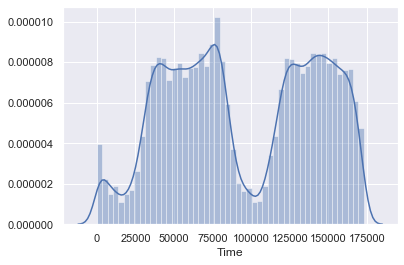

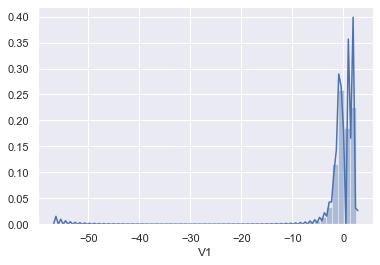

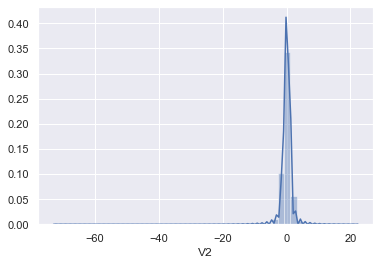

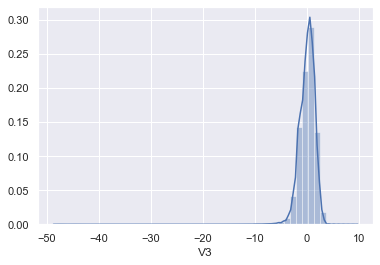

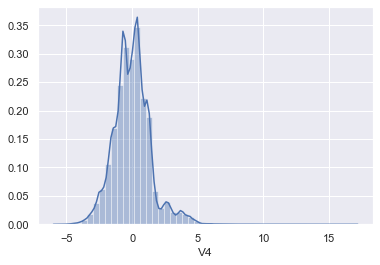

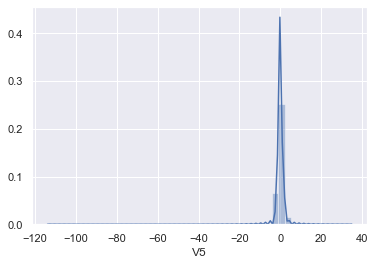

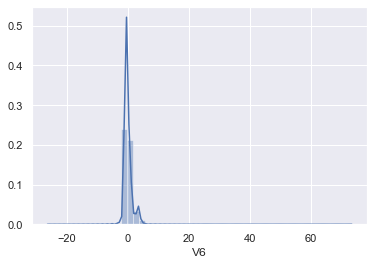

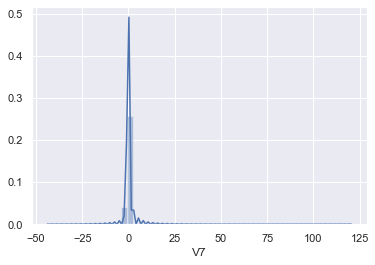

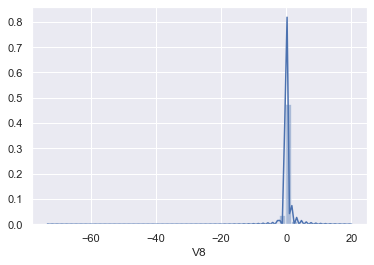

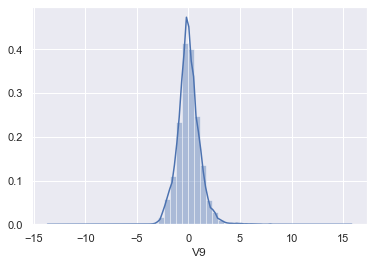

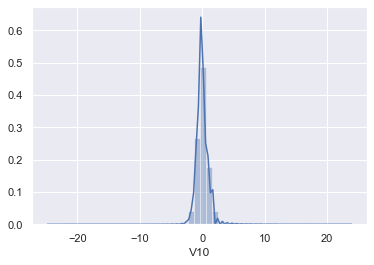

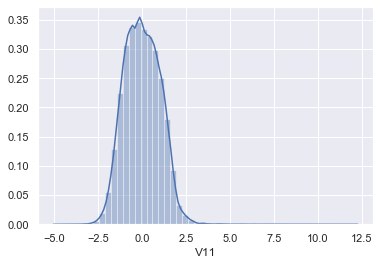

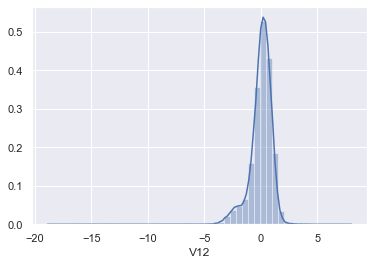

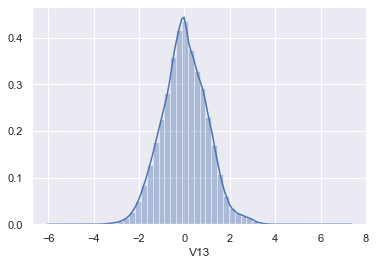

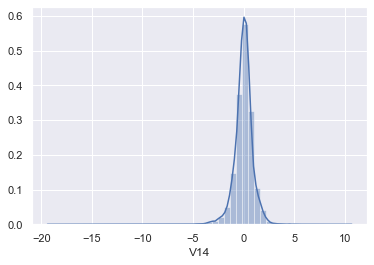

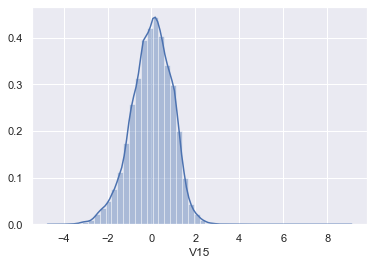

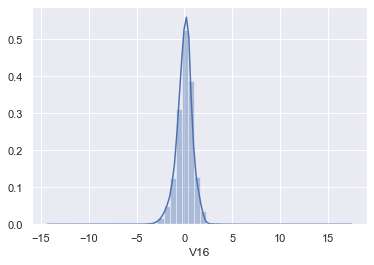

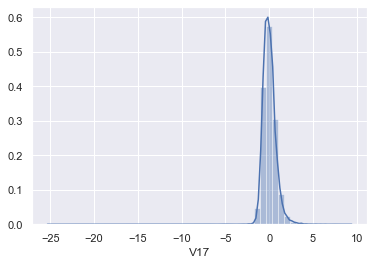

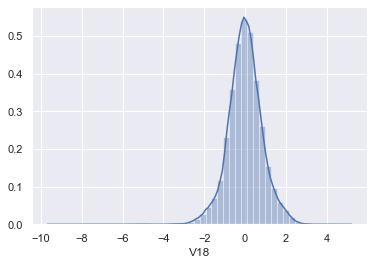

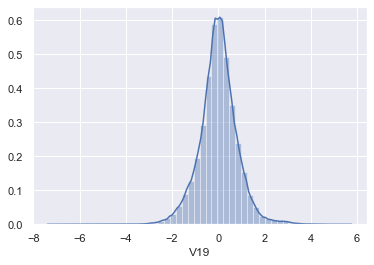

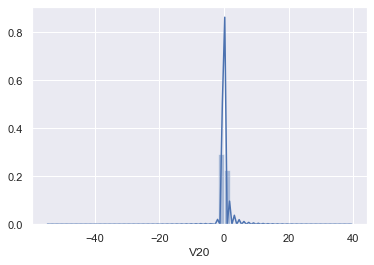

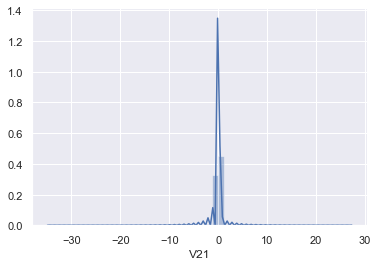

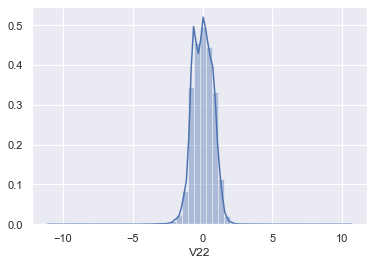

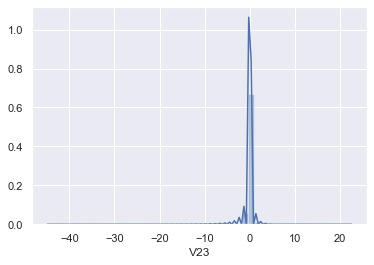

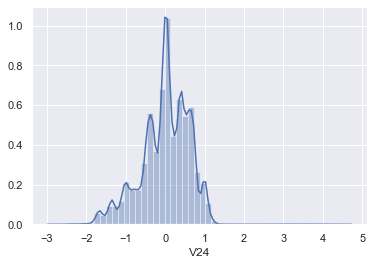

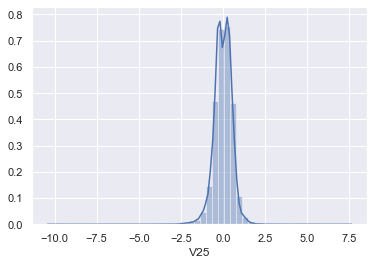

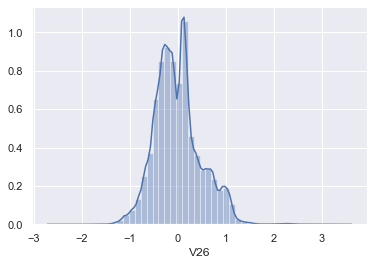

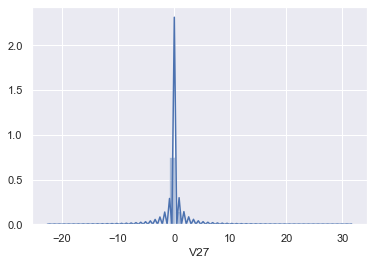

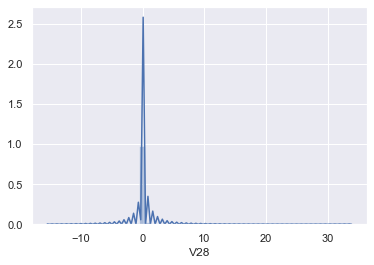

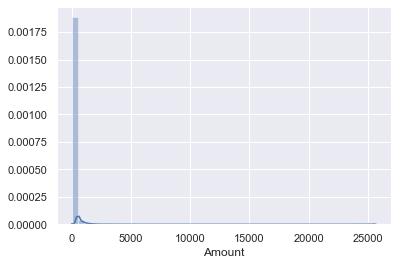

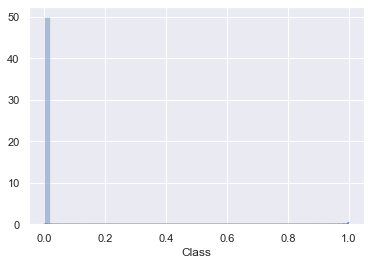

In [7]:
# Note: do not run this cell if concerned about runtime

# Looking at distributions to see whether the variables are scaled
sns.set(color_codes=True)
for i, col in enumerate(input_df.columns):
    plt.figure(i)
    sns.distplot(input_df[col])

In [8]:
plt.close('all')

In [4]:
X = input_df.drop(columns=['Class'])
y = input_df.Class

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [13]:
# Judging from the distributions and means, only the time and amount features need to be scaled
time_scaler = RobustScaler()
amount_scaler = RobustScaler()

x_train['time_scaled'] = time_scaler.fit_transform(x_train.Time.values.reshape(-1,1))
x_train['amount_scaled'] = amount_scaler.fit_transform(x_train.Amount.values.reshape(-1,1))
x_train = x_train.drop(columns=['Time', 'Amount'])

x_test['time_scaled'] = time_scaler.transform(x_test.Time.values.reshape(-1,1))
x_test['amount_scaled'] = amount_scaler.transform(x_test.Amount.values.reshape(-1,1))
x_test = x_test.drop(columns=['Time', 'Amount'])

In [7]:
y_train.value_counts()

0    213236
1       369
Name: Class, dtype: int64

In [8]:
y_test.value_counts()

0    71079
1      123
Name: Class, dtype: int64

In [9]:
# Function to print out classification reports easily
def evaluate(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(x_test)
    print()  
    print(classification_report(y_test, prediction))

# Method used to balance the data

In [14]:
#OverSmapling train Data
overSampler = RandomOverSampler()
underSampler = RandomUnderSampler()
adasynSampler = ADASYN()
x_train_over, y_train_over = overSampler.fit_resample(x_train, y_train)
x_train_under, y_train_under = underSampler.fit_resample(x_train, y_train)
x_train_adasyn, y_train_adasyn = adasynSampler.fit_resample(x_train, y_train)

In [18]:
#check if data is balanced data

In [15]:
collections.Counter(y_train_under)

Counter({0: 369, 1: 369})

In [16]:
collections.Counter(y_train_over)

Counter({0: 213236, 1: 213236})

In [17]:
collections.Counter(y_train_adasyn)

Counter({0: 213236, 1: 213234})

# Different Classifiers used

In [18]:
#Classifiers list no sampling
perceptron = Perceptron()
logit = LogisticRegression()
svc = LinearSVC()
nb = GaussianNB()
classifiers = [perceptron, logit, svc, nb]

# Training and Predicting

In [19]:
print("Results:")
for c in classifiers:
    print(type(c).__name__)
    print("Imbalanced data:")
    evaluate(c, x_train, y_train)
    print("UnderSampling:")
    evaluate(c, x_train_under, y_train_under)
    print("OverSampling:")
    evaluate(c, x_train_over, y_train_over)
    print("AdasynSampling:")
    evaluate(c, x_train_adasyn, y_train_adasyn)

Results:
Perceptron
Imbalanced data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.81      0.78       123

    accuracy                           1.00     71202
   macro avg       0.87      0.91      0.89     71202
weighted avg       1.00      1.00      1.00     71202

UnderSampling:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71079
           1       0.02      0.93      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.93      0.50     71202
weighted avg       1.00      0.93      0.96     71202

OverSampling:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71079
           1       0.02      0.92      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.93      0.50     71202
weigh